In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import json
filename = 'data_N10000000_k1000_Nexp10_-1.5272758204764476.json'

with open(filename, 'r') as json_file:
    data = json.load(json_file)

data

{'pool_name': 'QE',
 'initial_energy': -1.5018976144430205,
 'fci_energy': -1.5272758204764476,
 'data_list': [{'energies_statevector': [-1.5018976144430205],
   'energies_uniform': [-1.5019207647073347],
   'energies_vmsa': [-1.501940468611279],
   'energies_vpsr': [-1.5018750598744386],
   'std_uniform': [7.959303793444954e-05],
   'std_vmsa': [0.0001547745919124294],
   'std_vpsr': [0.0001315707602247568],
   'shots_uniform': [[588236,
     588236,
     588236,
     588236,
     588236,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235]],
   'shots_vmsa': [[501917,
     501885,
     501821,
     501885,
     770068,
     740418,
     754212,
     770434,
     736915,
     740340,
     729916,
     726960,
     500827,
     501920,
     501920,
     501559,
     1]],
   'shots_vpsr': [[459474,
     459364,
     457846,
     459143,
     676809,
     680230,
     695062,
     66411

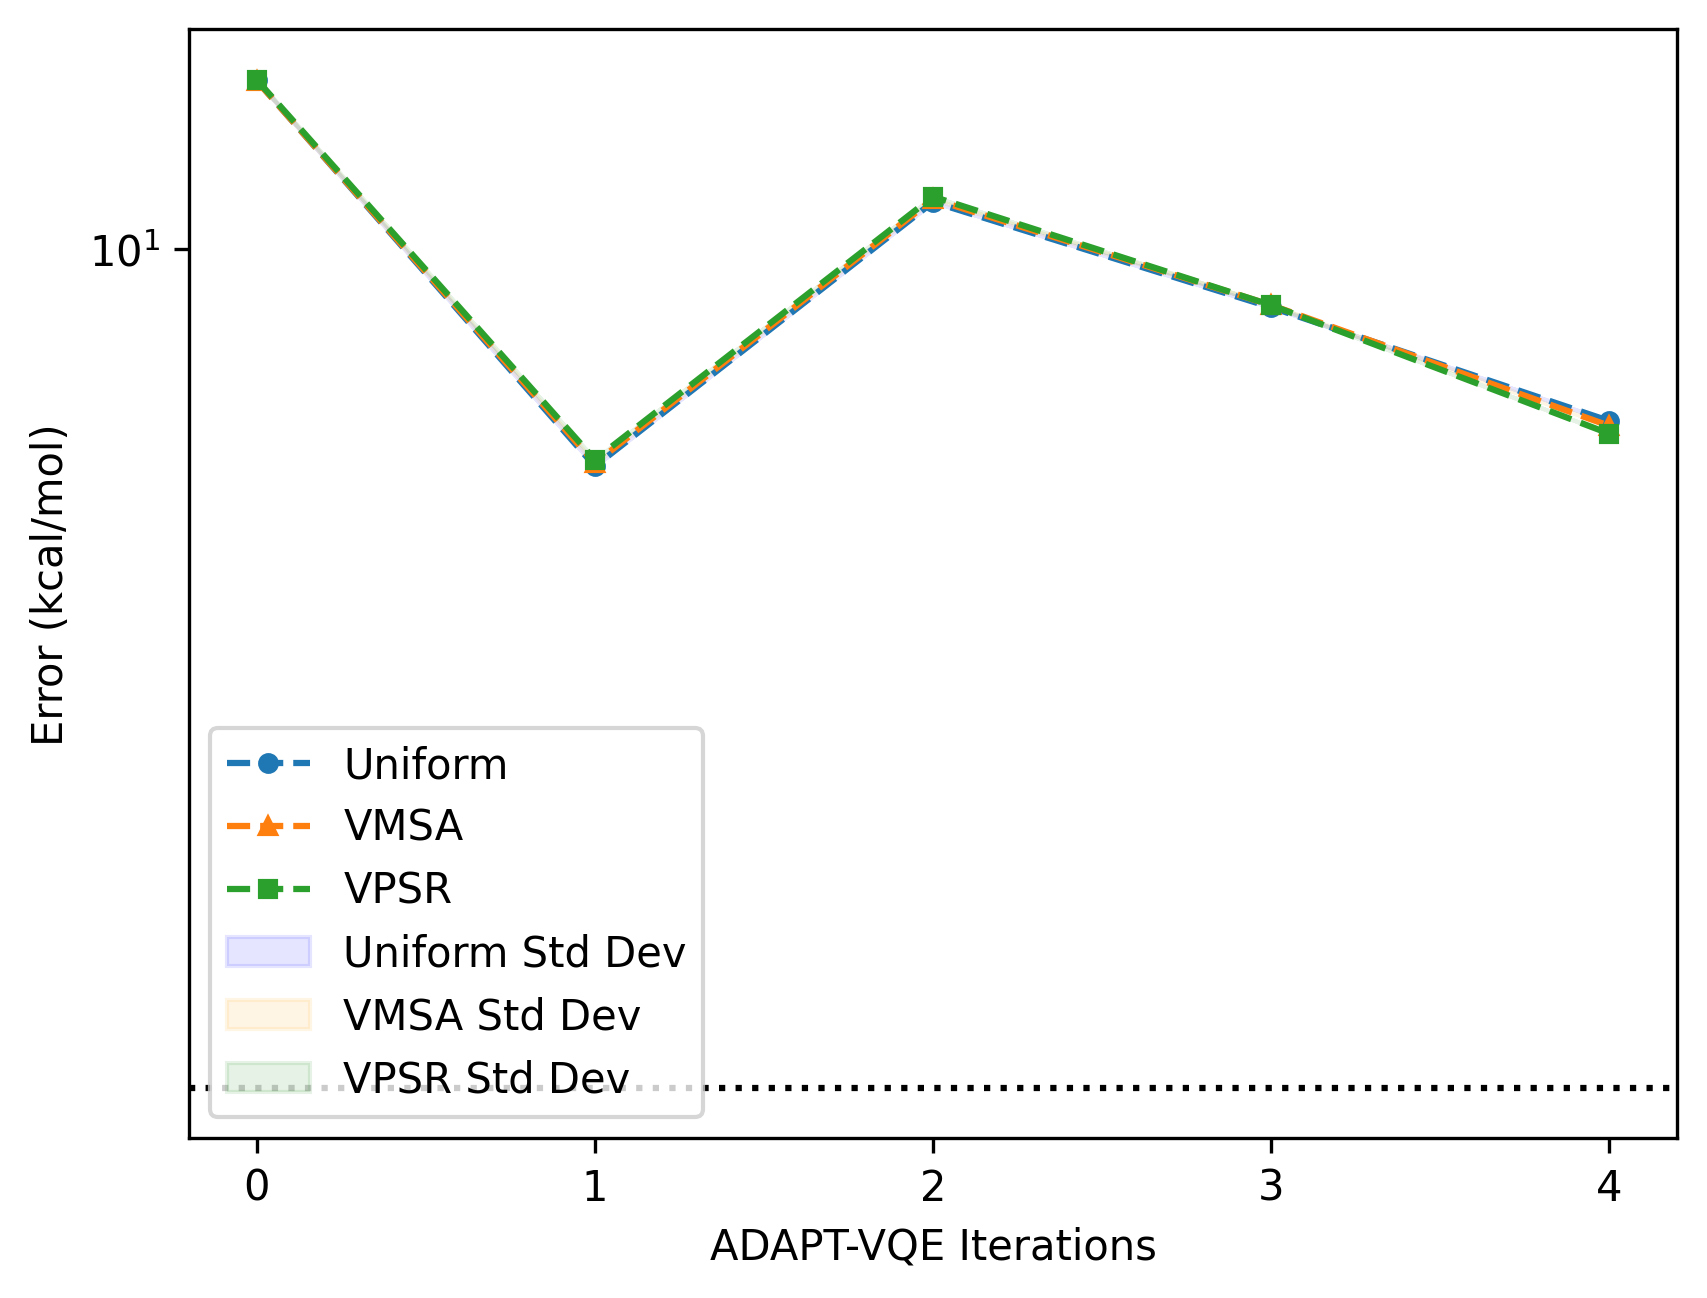

In [64]:
plt.rcParams['figure.dpi'] = 300
exact_energy = data['fci_energy']
chemac = 627.5094

energies_statevector = []
energies_uniform = []
energies_vmsa = []
energies_vpsr = []

std_uniform = []
std_vmsa = []
std_vpsr = []

for i in range(len(data['data_list'])):
    energies_statevector.append(data['data_list'][i]['energies_statevector'][-1])
    energies_uniform.append(data['data_list'][i]['energies_uniform'][-1])
    energies_vmsa.append(data['data_list'][i]['energies_vmsa'][-1])
    energies_vpsr.append(data['data_list'][i]['energies_vpsr'][-1])
    
    std_uniform.append(data['data_list'][i]['std_uniform'][-1])
    std_vmsa.append(data['data_list'][i]['std_vmsa'][-1])
    std_vpsr.append(data['data_list'][i]['std_vpsr'][-1])


error_statevector = np.abs(np.array(energies_statevector) - exact_energy)*chemac
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)*chemac
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)*chemac
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)*chemac


# # Removing indices 
# indices_to_remove = [1,2,3,4,5,6,7,8,9]

# # Apply np.delete to remove indices 2 and 3 from all relevant arrays
# energies_statevector = np.delete(energies_statevector, indices_to_remove)
# energies_uniform = np.delete(energies_uniform, indices_to_remove)
# energies_vmsa = np.delete(energies_vmsa, indices_to_remove)
# energies_vpsr = np.delete(energies_vpsr, indices_to_remove)

# error_statevector = np.delete(error_statevector, indices_to_remove)
# error_uniform = np.delete(error_uniform, indices_to_remove)
# error_vmsa = np.delete(error_vmsa, indices_to_remove)
# error_vpsr = np.delete(error_vpsr, indices_to_remove)

# std_uniform = np.delete(std_uniform, indices_to_remove)
# std_vmsa = np.delete(std_vmsa, indices_to_remove)
# std_vpsr = np.delete(std_vpsr, indices_to_remove)


x = range(len(error_statevector))
# plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')
plt.plot(x, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(x, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(x, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('symlog', linthresh=1e1)
# plt.yscale('log')
# plt.ylim(-0.3,50)
plt.ylabel("Error (kcal/mol)")
plt.xlabel("ADAPT-VQE Iterations")
plt.xticks([0,1,2,3,4])
plt.legend()

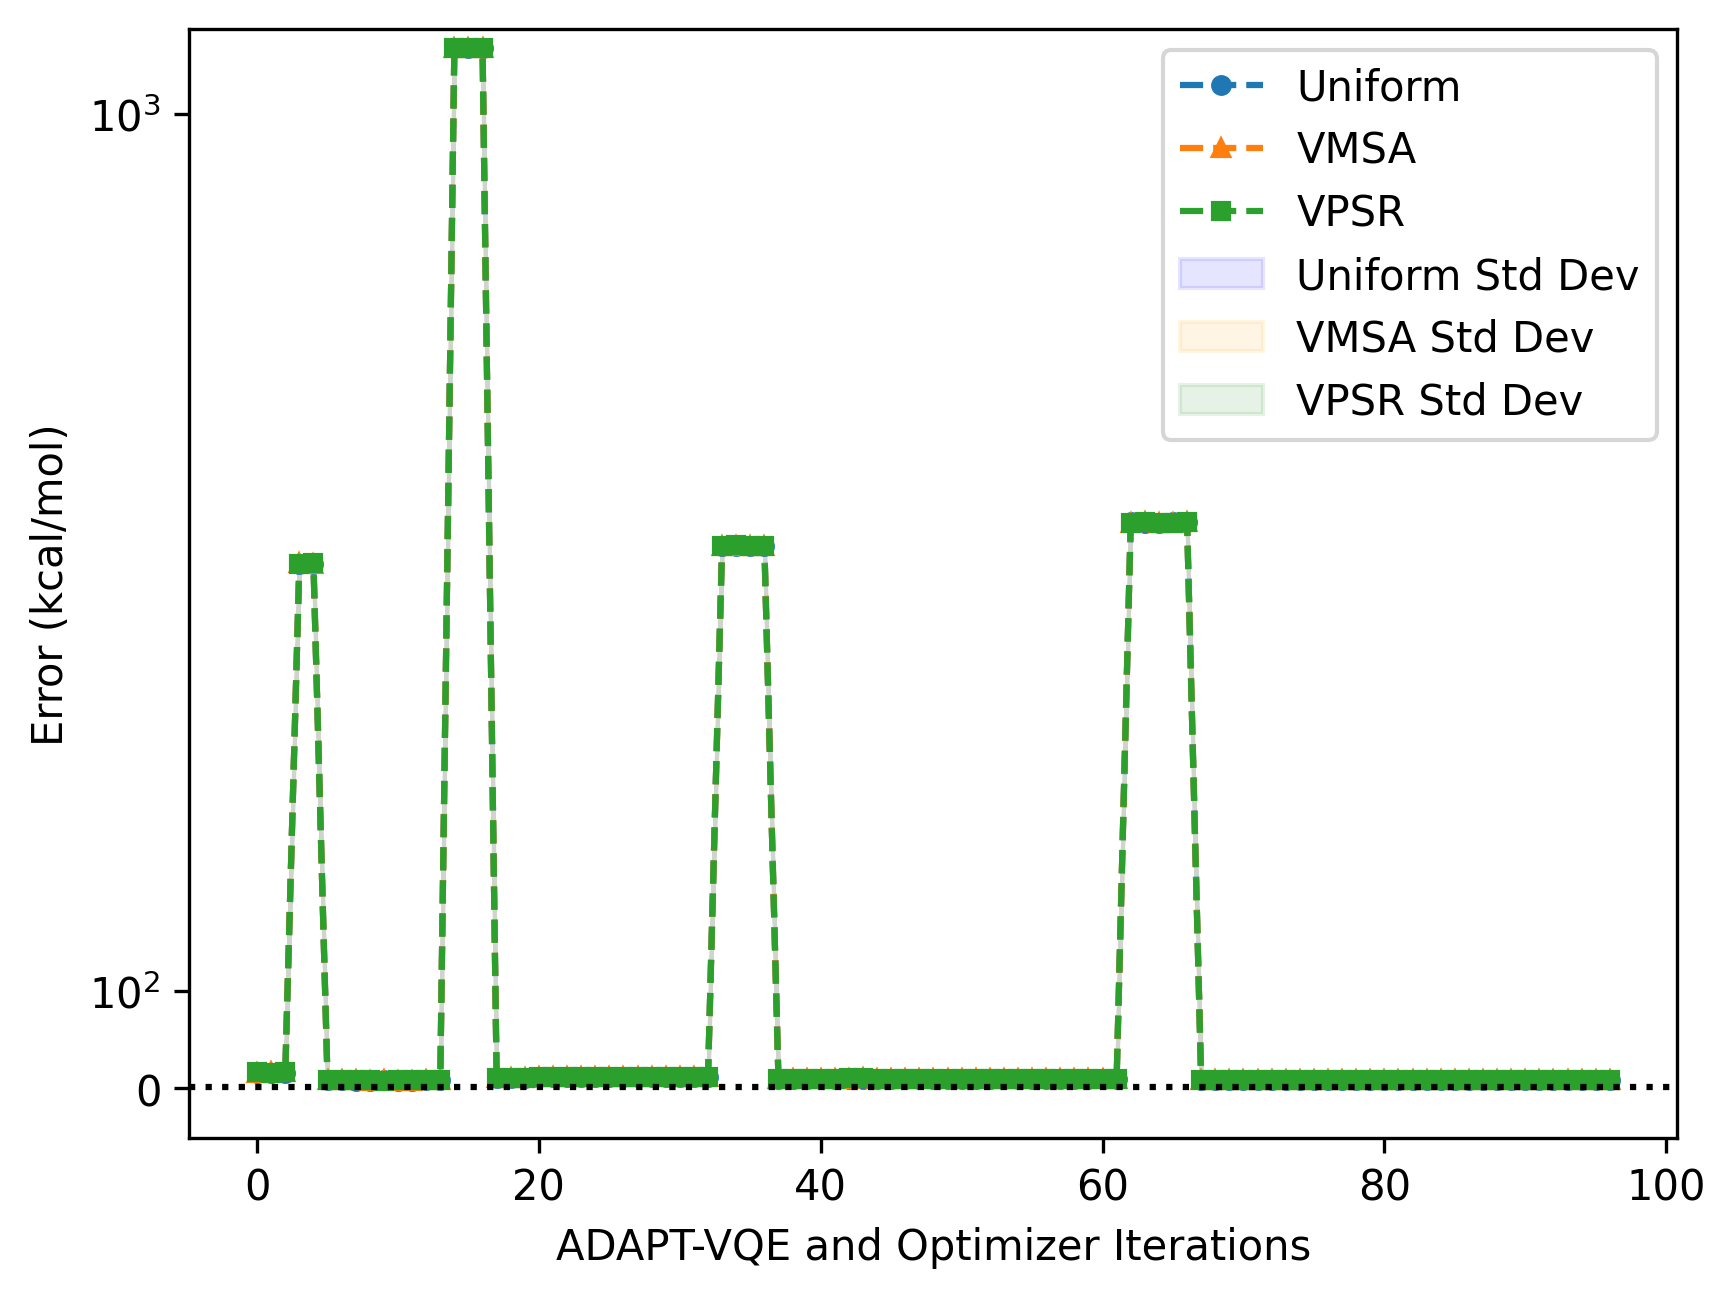

In [65]:
plt.rcParams['figure.dpi'] = 300
exact_energy = data['fci_energy']
chemac = 627.5094

energies_statevector = np.array([])
energies_uniform = np.array([])
energies_vmsa = np.array([])
energies_vpsr = np.array([])

std_uniform = np.array([])
std_vmsa = np.array([])
std_vpsr = np.array([])

for i in range(len(data['data_list'])):
    energies_statevector = np.append(energies_statevector, np.array(data['data_list'][i]['energies_statevector']))
    energies_uniform = np.append(energies_uniform, np.array(data['data_list'][i]['energies_uniform']))
    energies_vmsa = np.append(energies_vmsa, np.array(data['data_list'][i]['energies_vmsa']))
    energies_vpsr = np.append(energies_vpsr, np.array(data['data_list'][i]['energies_vpsr']))
    std_uniform = np.append(std_uniform, np.array(data['data_list'][i]['std_uniform']))
    std_vmsa = np.append(std_vmsa, np.array(data['data_list'][i]['std_vmsa']))
    std_vpsr = np.append(std_vpsr, np.array(data['data_list'][i]['std_vpsr']))


error_statevector = np.abs(np.array(energies_statevector) - exact_energy)*chemac
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)*chemac
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)*chemac
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)*chemac


# # Removing indices 
# indices_to_remove = [1,2,3,4,5,6,7,8,9]

# # Apply np.delete to remove indices 2 and 3 from all relevant arrays
# energies_statevector = np.delete(energies_statevector, indices_to_remove)
# energies_uniform = np.delete(energies_uniform, indices_to_remove)
# energies_vmsa = np.delete(energies_vmsa, indices_to_remove)
# energies_vpsr = np.delete(energies_vpsr, indices_to_remove)

# error_statevector = np.delete(error_statevector, indices_to_remove)
# error_uniform = np.delete(error_uniform, indices_to_remove)
# error_vmsa = np.delete(error_vmsa, indices_to_remove)
# error_vpsr = np.delete(error_vpsr, indices_to_remove)

# std_uniform = np.delete(std_uniform, indices_to_remove)
# std_vmsa = np.delete(std_vmsa, indices_to_remove)
# std_vpsr = np.delete(std_vpsr, indices_to_remove)


x = range(len(error_statevector))
# plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')
plt.plot(x, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(x, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(x, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('symlog', linthresh=1e3)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(-10,1000)
plt.ylabel("Error (kcal/mol)")
plt.xlabel("ADAPT-VQE and Optimizer Iterations")
# plt.xticks([0,1,2,3,4])
plt.legend()

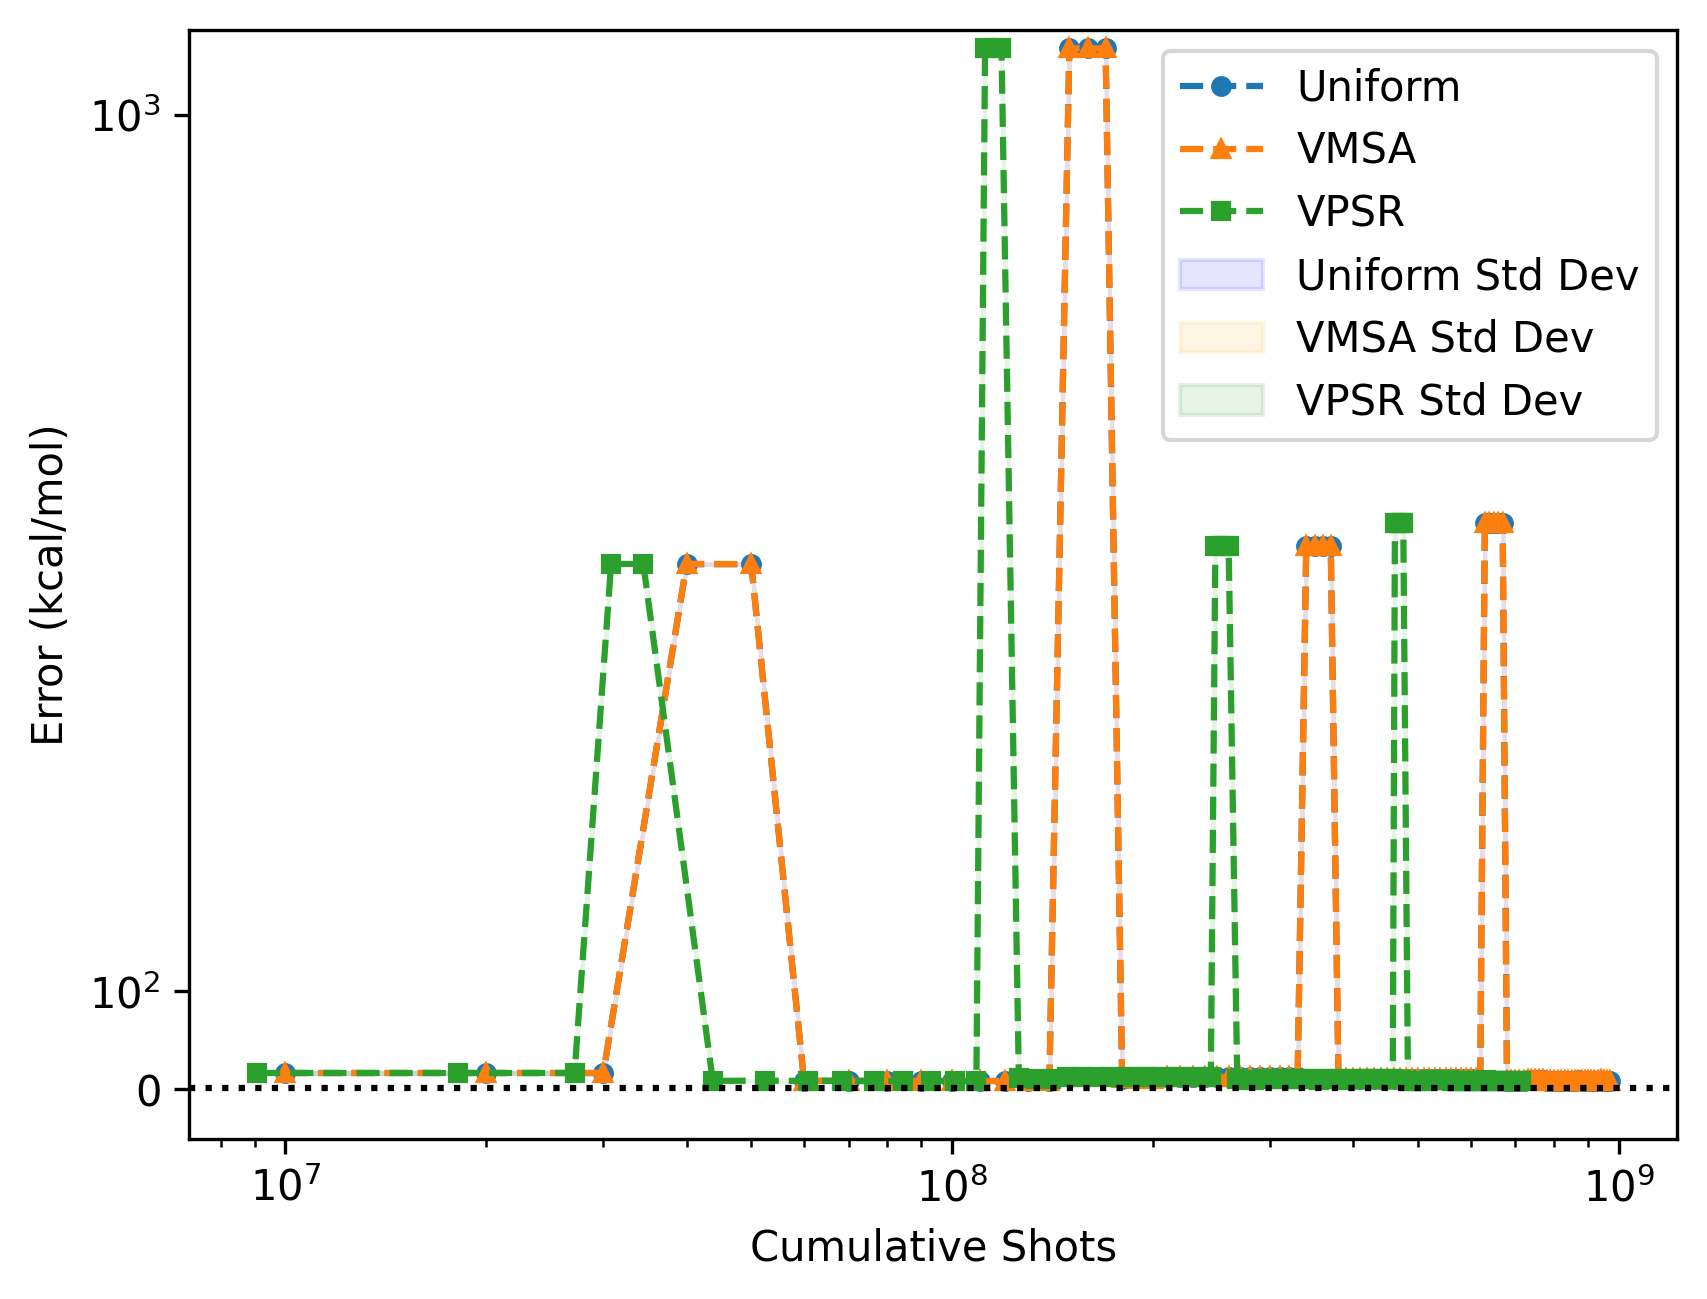

In [38]:
plt.rcParams['figure.dpi'] = 300
exact_energy = data['fci_energy']
chemac = 627.5094

energies_statevector = np.array([])
energies_uniform = np.array([])
energies_vmsa = np.array([])
energies_vpsr = np.array([])

std_uniform = np.array([])
std_vmsa = np.array([])
std_vpsr = np.array([])

shots_uniform = []
shots_vmsa = []
shots_vpsr = []


for i in range(len(data['data_list'])):
    energies_statevector = np.append(energies_statevector, np.array(data['data_list'][i]['energies_statevector']))
    energies_uniform = np.append(energies_uniform, np.array(data['data_list'][i]['energies_uniform']))
    energies_vmsa = np.append(energies_vmsa, np.array(data['data_list'][i]['energies_vmsa']))
    energies_vpsr = np.append(energies_vpsr, np.array(data['data_list'][i]['energies_vpsr']))
    
    std_uniform = np.append(std_uniform, np.array(data['data_list'][i]['std_uniform']))
    std_vmsa = np.append(std_vmsa, np.array(data['data_list'][i]['std_vmsa']))
    std_vpsr = np.append(std_vpsr, np.array(data['data_list'][i]['std_vpsr']))
    
    shots_uniform.append([sum(sublist) for sublist in(data['data_list'][i]['shots_uniform'])])
    shots_vmsa.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vmsa'])])
    shots_vpsr.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vpsr'])])

shots_uniform = np.array([item for sublist in shots_uniform for item in sublist])
shots_vmsa = shots_uniform
shots_vpsr = np.array([item for sublist in shots_vpsr for item in sublist] ) + 5000

shots_uniform = np.cumsum(shots_uniform)
shots_vmsa = np.cumsum(shots_vmsa)
shots_vpsr = np.cumsum(shots_vpsr)

error_statevector = np.abs(np.array(energies_statevector) - exact_energy)*chemac
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)*chemac
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)*chemac
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)*chemac

# x = range(len(error_statevector))
# plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')
plt.plot(shots_uniform, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(shots_vmsa, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(shots_vpsr, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(shots_uniform, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(shots_vmsa, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(shots_vpsr, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('symlog', linthresh=1e3)
# plt.yscale('log')
plt.xscale('log')
# plt.ylim(-10,1000)
plt.ylabel("Error (kcal/mol)")
plt.xlabel("Cumulative Shots")
# plt.xticks([0,1,2,3,4])
plt.legend()

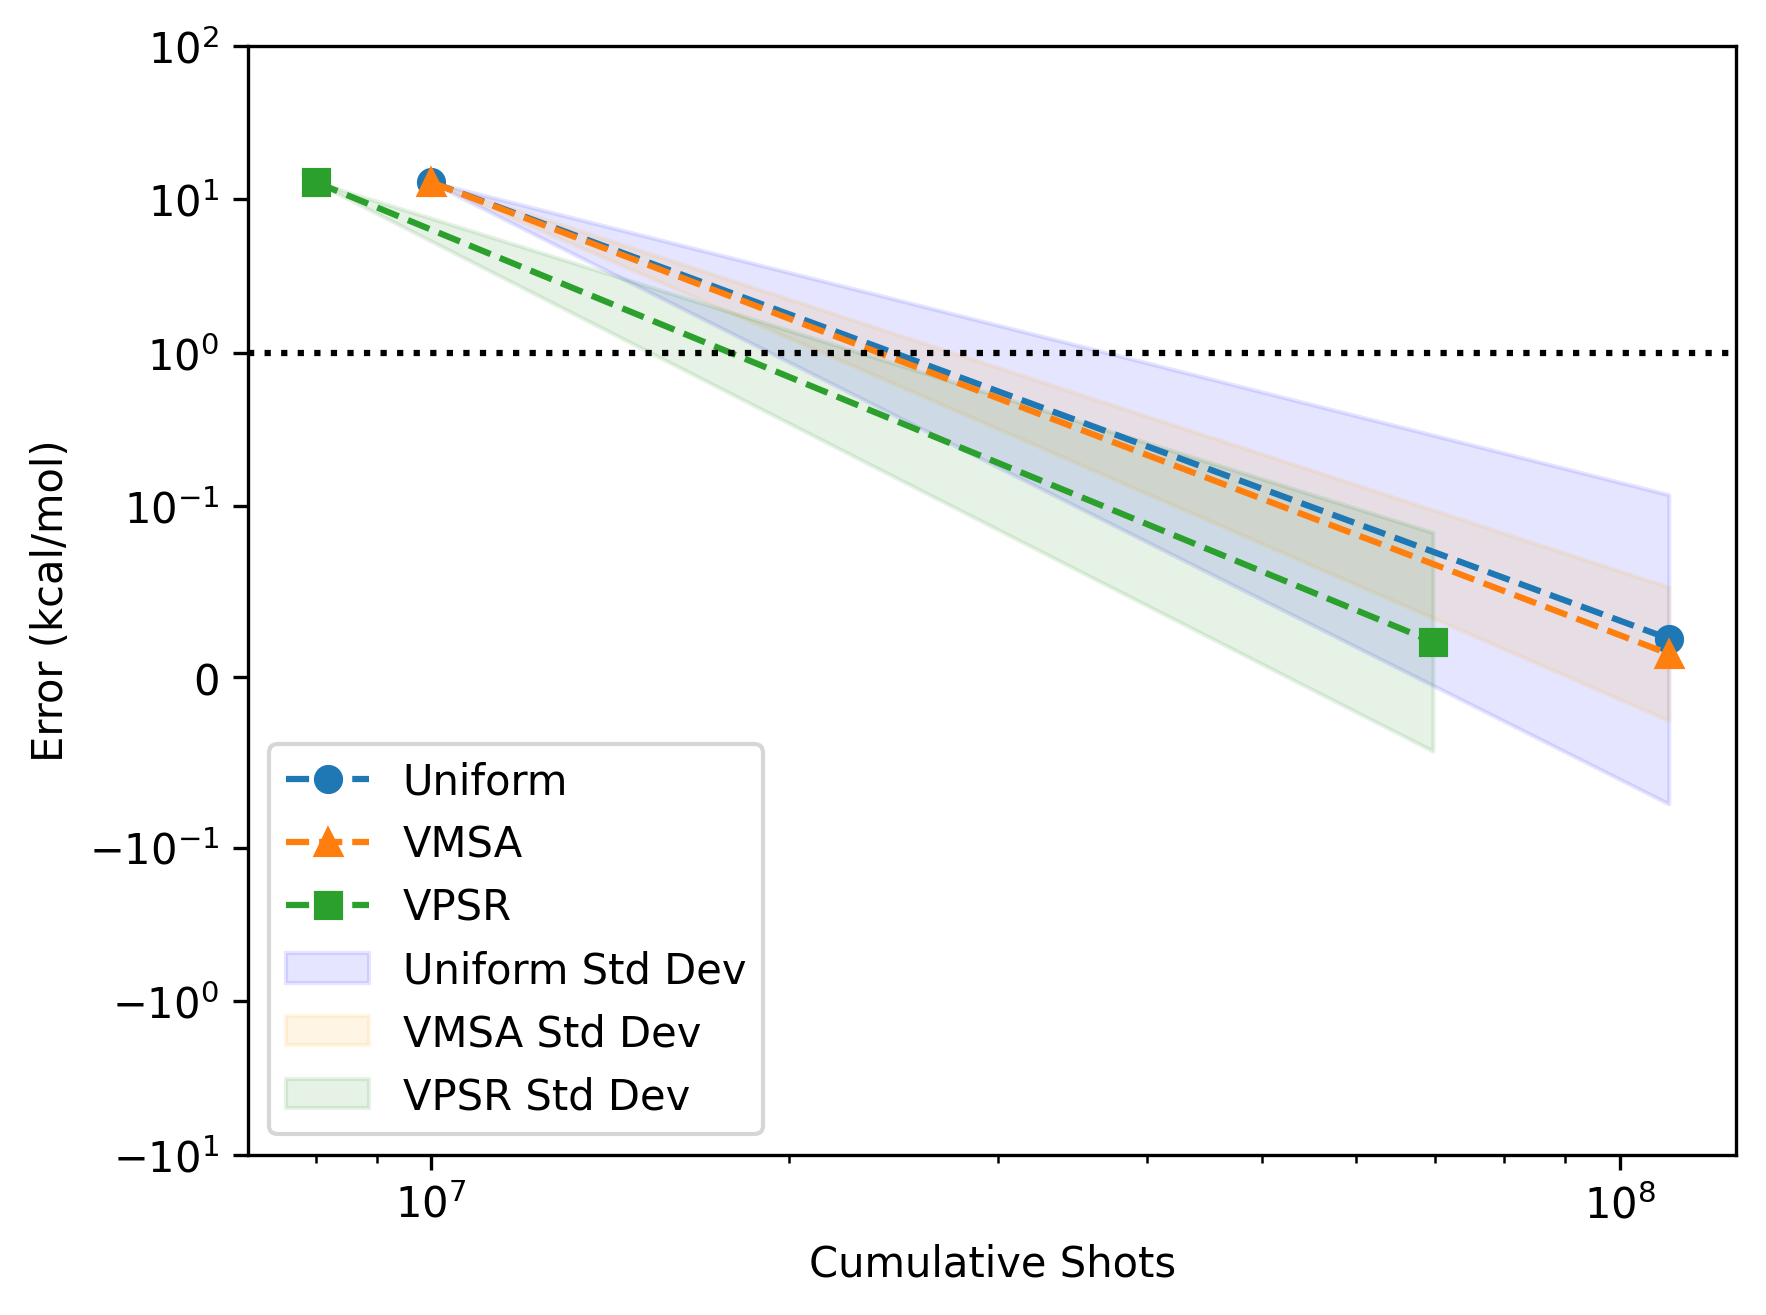

In [217]:
plt.rcParams['figure.dpi'] = 300

exact_energy = data['fci_energy']
chemac = 627.5094

energies_statevector = np.concatenate([data['data_list'][0]['energies_statevector'], data['data_list'][1]['energies_statevector']])
energies_uniform = np.concatenate([data['data_list'][0]['energies_uniform'], data['data_list'][1]['energies_uniform']])
energies_vmsa = np.concatenate([data['data_list'][0]['energies_vmsa'], data['data_list'][1]['energies_vmsa']])
energies_vpsr = np.concatenate([data['data_list'][0]['energies_vpsr'], data['data_list'][1]['energies_vpsr']])

error_statevector = np.abs(energies_statevector - exact_energy)*chemac
error_uniform = np.abs(energies_uniform - exact_energy)*chemac
error_vmsa = np.abs(energies_vmsa - exact_energy)*chemac
error_vpsr = np.abs(energies_vpsr - exact_energy)*chemac

std_uniform = np.concatenate([data['data_list'][0]['std_uniform'], data['data_list'][1]['std_uniform']])*chemac
std_vmsa = np.concatenate([data['data_list'][0]['std_vmsa'], data['data_list'][1]['std_vmsa']])*chemac
std_vpsr = np.concatenate([data['data_list'][0]['std_vpsr'], data['data_list'][1]['std_vpsr']])*chemac

shots_uniform = []
shots_vmsa = []
shots_vpsr = []

for i in range(len(data['data_list'])):
    shots_uniform.append([sum(sublist) for sublist in(data['data_list'][i]['shots_uniform'])])
    shots_vmsa.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vmsa'])])
    shots_vpsr.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vpsr'])])

shots_uniform = np.array([item for sublist in shots_uniform for item in sublist])
shots_vmsa = shots_uniform
shots_vpsr = np.array([item for sublist in shots_vpsr for item in sublist] ) + 5000

shots_uniform = np.cumsum(shots_uniform)
shots_vmsa = np.cumsum(shots_vmsa)
shots_vpsr = np.cumsum(shots_vpsr)

# Hide indices 2 and 3
indices_to_remove = [1,2,3,4,5,6,7,8,9]

# Apply np.delete to remove indices 2 and 3 from all relevant arrays
shots_uniform = np.delete(shots_uniform, indices_to_remove)
shots_vmsa = np.delete(shots_vmsa, indices_to_remove)
shots_vpsr = np.delete(shots_vpsr, indices_to_remove)

error_statevector = np.delete(error_statevector, indices_to_remove)
error_uniform = np.delete(error_uniform, indices_to_remove)
error_vmsa = np.delete(error_vmsa, indices_to_remove)
error_vpsr = np.delete(error_vpsr, indices_to_remove)

std_uniform = np.delete(std_uniform, indices_to_remove)
std_vmsa = np.delete(std_vmsa, indices_to_remove)
std_vpsr = np.delete(std_vpsr, indices_to_remove)



plt.plot(shots_uniform, error_uniform, label='Uniform', linestyle='--', marker='o')
plt.plot(shots_vmsa, error_vmsa, label='VMSA', linestyle='--', marker='^')
plt.plot(shots_vpsr, error_vpsr, label='VPSR', linestyle='--', marker='s')


plt.fill_between(shots_uniform, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(shots_vmsa, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(shots_vpsr, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('symlog', linthresh=1e-1)
# plt.yscale('log')
plt.ylim(-10,100)
plt.xscale('log')
plt.ylabel("Error (kcal/mol)")
plt.xlabel("Cumulative Shots")
plt.legend()

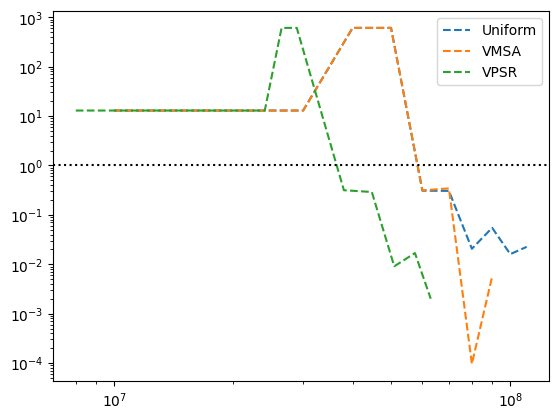

In [ ]:



# plt.plot(shots_u, error_statevector, label='Statevector', linestyle='--')
plt.plot(shots_uniform, error_uniform, label='Uniform', linestyle='--')
plt.plot(shots_vmsa[0:-2], error_vmsa[0:-2], label='VMSA', linestyle='--')
plt.plot(shots_vpsr[0:-1], error_vpsr[0:-1], label='VPSR', linestyle='--')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('log')
plt.xscale('log')
plt.legend()

<class 'list'>


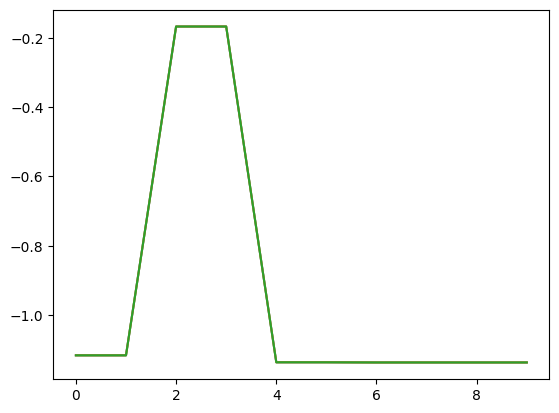

In [29]:
import matplotlib.pyplot as plt


plt.plot(data['data_list'][1]['energies_statevector'])
plt.plot(data['data_list'][1]['energies_uniform'])
plt.plot(data['data_list'][1]['energies_vpsr'])
print(type(data['data_list'][1]['energies_statevector']))
# plt.yscale('log')

In [82]:
exact_energy = data['fci_energy']
chemac = 627.5094
# energies_statevector = np.concatenate([data['data_list'][0]['energies_statevector'][-1], data['data_list'][1]['energies_statevector'][-1]])
# energies_uniform = np.concatenate([data['data_list'][0]['energies_uniform'][-1], data['data_list'][1]['energies_uniform'][-1]])
# energies_vmsa = np.concatenate([data['data_list'][0]['energies_vmsa'][-1], data['data_list'][1]['energies_vmsa'][-1]])
# energies_vpsr = np.concatenate([data['data_list'][0]['energies_vpsr'][-1], data['data_list'][1]['energies_vpsr'][-1]])

shots_uniform = []
shots_vmsa = []
shots_vpsr = []

for i in range(len(data['data_list'])):
    shots_uniform.append([sum(sublist) for sublist in(data['data_list'][i]['shots_uniform'])][-1])
    shots_vmsa.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vmsa'])][-1])
    shots_vpsr.append([sum(sublist) for sublist in(data['data_list'][i]['shots_vpsr'])][-1])

shots_uniform = np.array([item for sublist in shots_uniform for item in sublist])
shots_vmsa = shots_uniform
shots_vpsr = np.array([item for sublist in shots_vpsr for item in sublist] ) + 5000

shots_uniform = np.cumsum(shots_uniform)
shots_vmsa = np.cumsum(shots_vmsa)
shots_vpsr = np.cumsum(shots_vpsr)

print(shots_uniform)
print(shots_vmsa)
print(shots_vpsr)



error_statevector = np.abs(energies_statevector - exact_energy)*chemac
error_uniform = np.abs(energies_uniform - exact_energy)*chemac
error_vmsa = np.abs(energies_vmsa - exact_energy)*chemac
error_vpsr = np.abs(energies_vpsr - exact_energy)*chemac

print(error_statevector)
# print(energies_uniform)
plt.plot(error_statevector, label='Statevector', linestyle='--')
plt.plot(error_uniform, label='Uniform', linestyle='--')
plt.plot(error_vmsa, label='VMSA', linestyle='--')
plt.plot(error_vpsr, label='VPSR', linestyle='--')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('log')
plt.legend()

TypeError: 'int' object is not iterable